
##     Classification
Build a classification tree based on the data given in `data/heart.csv.gz` using
- [scikit-learn](http://scikit-learn.org/).



### Preparation

In [1]:
# some imports
from IPython.display import Image
from pprint import pprint
import subprocess

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  # just for the styling
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# def prepare_data(df, categoricals, target_name):
#     ...
#     return df_encoded, categorical_codes, class_names

In [2]:
def prepare_data(df, categoricals, target_name):
    
    df = df.dropna()
    
    if not categoricals:
        categoricals = []
        
    # construct a mapping that assign each categorical value it's code
    categorical_codes = {}
    for categorical in categoricals:
        categories = df[categorical].cat.categories
        categorical_codes[categorical] = {'names': categories, 'codes': list(range(len(categories)))}

    # for later use we save the class names
    class_names = categorical_codes[target_name]['names']
    class_names

    # the classifier needs numbers, so we replace the categorical values by their code
    # copy all non-categorical columns
    df_new = df[[name for name in df if name not in categoricals]]
    # from the categorical ones we keep the code-representation
    for categorical in categoricals:
        df_new[categorical] = df[categorical].cat.codes
    
    return df_new, categorical_codes, class_names

In [3]:
# we have a few categorical variables, so we specify the dtype
categoricals = ['ChestPain', 'Thal', 'AHD']
df = pd.read_csv('data/heart.csv.gz', index_col=0,
                 dtype={name: 'category' for name in categoricals})
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
Index,,,,,,,,,,,,,,
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
target_name = 'AHD'  # this is our target variable
feature_names = [name for name in df if name != target_name]

df_encoded, categorical_codes, class_names = prepare_data(df, categoricals, target_name)
df_encoded.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain,Thal,AHD
Index,,,,,,,,,,,,,,
1,63,1,145,233,1,2,150,0,2.3,3,0.0,3,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,0,1,1
3,67,1,120,229,0,2,129,1,2.6,2,2.0,0,2,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,1,1,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,2,1,0


### Modelling

In [6]:
# our predictor variables / feature matrix / ...
X = df_encoded[feature_names].values
# our target variable
y = df_encoded[target_name].values

In [7]:
# our classifier - that's it!
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

In [8]:
clf = DecisionTreeClassifier(max_depth=2)  # max_depth=2
clf = clf.fit(X, y)

In [9]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [10]:
# let's draw a tree
dot_file_name = 'heart.dot'
png_file_name = 'heart.png'

with open(dot_file_name, 'w') as dot_data_file:
    dot_data_file = export_graphviz(clf,
                                    out_file=dot_data_file,
                                    feature_names=feature_names,
                                    class_names=class_names,
                                    filled=True)   
subprocess.check_call(['dot', '-Tpng', dot_file_name, '-o', png_file_name])

0

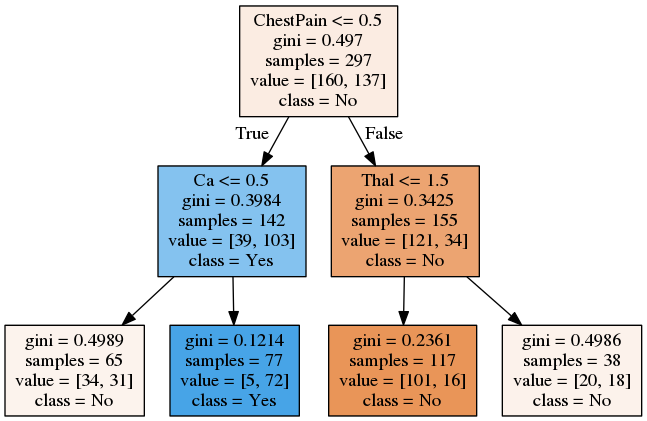

In [11]:
# and see...
Image(filename=png_file_name)

Disclaimer: there is more to do, please do not take this seriously ;)

#### Final remarks
- See e.g. http://scikit-learn.org/stable/modules/tree.html#tree and vary tree size to understand the problem of overfitting.
- Try http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html on the data and take a look at the field `variable_importance_`.
- Results differ from the ones discussed [here](http://www-bcf.usc.edu/~gareth/ISL/) - details matter!